In [ ]:
!uname -a

In [ ]:
import pandas as pd
import gzip as gz
import json

In [ ]:

fname = '/home/alawlor/data/amazon_reviews/aggressive_dedup.json.gz'

def _gen():
    with gz.open(fname, 'rb') as f:
        for i,line in enumerate(f):
            obj = json.loads(line)
            #print(obj)
            yield dict(reviewerID=obj['reviewerID'], asin=obj['asin'], overall=obj['overall'])
            #return
            
df = pd.DataFrame(_gen())
print('Done!')

In [ ]:
df.columns

In [ ]:
df

In [ ]:
df.to_pickle("userItemRating.pkl")

In [ ]:
items=pd.read_csv('items.csv')

In [ ]:
items.to_pickle("items.pkl")

# Load Data

## Read Data

In [3]:
import pandas as pd
dataset=[]
dataset = pd.read_pickle("userItemRating.pkl")

## Dataset Report

In [ ]:
def data_report(df=None):
    users = df.reviewerID.unique()
    items= df.asin.unique()
    ratings= df.overall.unique()
    n_users= len(users)
    n_items= len(items)
    n_reviews= len(df)
    density = ((n_reviews)/(n_users*n_items))
    meanReviewsPerUser=df['reviewerID'].value_counts().mean()
    meanReviewsPerItem=df['asin'].value_counts().mean()
    meanRating=df['overall'].mean()
    print("#Users: ",n_users,"        #Items: ",n_items,"        #Reviews: ",n_reviews,"        Density: ",density,"%")
    print("Mean reviews per User: ",meanReviewsPerUser,"   Mean reviews per Item: ",meanReviewsPerItem,"   Mean Rating (Overall): ",meanRating)
    print("Dataset Size: ",len(df),"        #Duplicate Records: ",((len(df))-(len(dataset.drop_duplicates(subset=['asin', 'reviewerID'])))))

data_report(dataset)

## After removing duplicate data

In [3]:
dataset= dataset.drop_duplicates(subset=['asin', 'reviewerID'], keep="last")
#data_report(dataset)

,asin,overall,reviewerID
0,B003UYU16G,5.0,A00000262KYZUE4J55XGL
1,B005FYPK9C,5.0,A000008615DZQRRI946FO
2,B000VEBG9Y,3.0,A00000922W28P2OCH6JSE
3,B001EJMS6K,4.0,A00000922W28P2OCH6JSE
4,B003XJCNVO,4.0,A00000922W28P2OCH6JSE
5,B00G3KN9LI,4.0,A00000922W28P2OCH6JSE
6,B000SAUVC4,5.0,A000013090ZI3HIT9N5V
7,B00125OS3C,5.0,A00001362Q1PGIX2FYSSH
8,B002IGHX40,2.0,A00001362Q1PGIX2FYSSH
9,B004WPCQKG,1.0,A00001483M88NBD66LEP0


# Plots

## Loading libraries and pre-computing data

In [70]:
#Load the libraries required
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np


#Pickle store/load function

def storePickle(df=None,name="temp.pkl"):
    df.to_pickle(name)
    
def loadPickle(name="temp.pkl"):
    df=pd.read_pickle(name)
    return df

#Grouping func

def groupingData(df=None,cols=['n_occurences','n_members']):
    df_Temp=pd.DataFrame(columns=cols)
    colName=list(df)
    df_Temp[cols[0]]=df.groupby(colName[0]).groups.keys()
    df_Temp[cols[1]]=df.groupby(colName[0]).size()
    df_Temp=df_Temp.fillna(0)
    return df_Temp

#Pre-compute the data to be used in plotting

df_grpRevUser = dataset[['reviewerID']].groupby('reviewerID', sort=False).agg({'reviewerID': 'count'})
df_grpRevItem = dataset[['asin']].groupby('asin', sort=False).agg({'asin': 'count'})
df_grpRateUser= dataset.groupby(['reviewerID'],sort=False).agg({'overall': 'mean'})
df_grpRateItem= dataset.groupby(['asin'],sort=False).agg({'overall': 'mean'})
#df_Temp['meanRatingUser'] = round(df.groupby(['reviewerID'],sort=False)['overall'].transform('mean'))
#df_Temp['meanRatingItem'] = round(df.groupby(['asin'],sort=False)['overall'].transform('mean'))
#storePickle(df_Temp,name="precompData.pkl")

In [9]:
# df_count_users = df_sample[['asin']].groupby('asin', sort=False).agg({'asin': 'count'})
%time df_preComp = preCompute(dataset)

CPU times: user 4min 38s, sys: 1min 46s, total: 6min 24s
Wall time: 8min 10s


In [16]:
#Grouping the data, for the plots
df_RevUser = groupingData(df_preComp[['reviewsUser']],cols=['reviews','n_users'])
df_RevItem = groupingData(df_preComp[['reviewsItem']],cols=['reviews','n_items'])
df_RateUser = groupingData(df_preComp[['meanRatingUser']],cols=['meanRatings','n_users'])
df_RateItem = groupingData(df_preComp[['meanRatingItem']],cols=['meanRatings','n_items'])

## Defining the plotting function

In [107]:
import numpy as np
import matplotlib as mlib
import matplotlib.pyplot as plt




def plotting(df=None,nbins=1,xmin=None,xmax=None, density=False, xlabel='', ylabel='', logscale=False ):
    if xmin==None:
        xmin=df.min()
    if xmax==None:
        xmax=(df.max())+1
    
    if density:
        cumulative,normed = True,True
    else:
        cumulative,normed = False,False
    
    bins=np.arange(xmin,xmax,nbins)
    #print(df)
    df.hist(bins=bins, normed=normed, cumulative=cumulative, figsize=(10,7) )
    mean_val = df.mean().values[0]
    plt.axvline(x=mean_val, color='r', label='mean number of reviews = {}'.format(mean_val), alpha=0.6)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    #plt.xlim(0, 20)
    if logscale:
        plt.yscale('log')
    #y_formatter = plt.ticker.ScalarFormatter(useOffset=False)
    #plt.yaxis.set_major_formatter(y_formatter)
    plt.legend()
    return

#Defined Plotting function
"""
def plotting(df_RU=None, df_RT=None, df_RateUser=None, df_RateItem=None):
    f, axarr = plt.subplots(2, 2, figsize=(15,12))

    axarr[0, 0].bar(df_RU['reviews'],df_RU['n_users'], align='center')
    axarr[0, 0].set_xlabel('#Reviews')
    axarr[0, 0].set_ylabel('#Users')
    axarr[0, 0].set_title('Reviews vs Users')
    axarr[0, 0].set_yscale('log')
    axarr[0, 0].set_xscale('log')
    #axarr[0, 0].ticklabel_format(style = 'plain')
    axarr[0, 0].axvline(df_RU['reviews'].mean(), color='b', linestyle='dashed', linewidth=1, alpha=0.4)
    axarr[0, 0].axhline(df_RU['n_users'].mean(), color='b', linestyle='dashed', linewidth=1, alpha=0.4)

    axarr[0, 1].bar(df_RT['reviews'],df_RT['n_items'], align='center')
    axarr[0, 1].set_xlabel('#Reviews')
    axarr[0, 1].set_ylabel('#Items')
    axarr[0, 1].set_title('Reviews vs Items')
    axarr[0, 1].set_yscale('log')
    axarr[0, 1].set_xscale('log')
    #axarr[0, 1].ticklabel_format(style = 'plain')
    axarr[0, 1].axvline(df_RT['reviews'].mean(), color='b', linestyle='dashed', linewidth=1, alpha=0.4)
    axarr[0, 1].axhline(df_RT['n_items'].mean(), color='b', linestyle='dashed', linewidth=1, alpha=0.4)

    axarr[1, 0].bar(df_RateUser['ratings'],df_RateUser['n_users'], align='center')
    axarr[1, 0].set_xlabel('#Ratings')
    axarr[1, 0].set_ylabel('#Users')
    axarr[1, 0].set_title('Ratings vs Users')
    #axarr[1, 0].set_yscale('log')
    #axarr[1, 0].set_xscale('log')
    axarr[1, 0].ticklabel_format(style = 'plain')
    axarr[1, 0].axhline(df_RateUser['n_users'].mean(), color='b', linestyle='dashed', linewidth=1, alpha=0.4)
    axarr[1, 0].axvline(df_RateUser['ratings'].mean(), color='b', linestyle='dashed', linewidth=1, alpha=0.4)

    axarr[1, 1].bar(df_RateItem['ratings'],df_RateItem['n_items'], align='center')
    axarr[1, 1].set_xlabel('#Ratings')
    axarr[1, 1].set_ylabel('#Items')
    axarr[1, 1].set_title('Ratings vs Items')
    #axarr[1, 1].set_yscale('log')
    #axarr[1, 1].set_xscale('log')
    axarr[1, 1].ticklabel_format(style = 'plain')
    axarr[1, 1].axhline(df_RateItem['n_items'].mean(), color='b', linestyle='dashed', linewidth=1, alpha=0.4)
    axarr[1, 1].axvline(df_RateItem['ratings'].mean(), color='b', linestyle='dashed', linewidth=1, alpha=0.4)
    plt.tight_layout()
    f.subplots_adjust(hspace=0.3)
    
  """  


"\ndef plotting(df_RU=None, df_RT=None, df_RateUser=None, df_RateItem=None):\n    f, axarr = plt.subplots(2, 2, figsize=(15,12))\n\n    axarr[0, 0].bar(df_RU['reviews'],df_RU['n_users'], align='center')\n    axarr[0, 0].set_xlabel('#Reviews')\n    axarr[0, 0].set_ylabel('#Users')\n    axarr[0, 0].set_title('Reviews vs Users')\n    axarr[0, 0].set_yscale('log')\n    axarr[0, 0].set_xscale('log')\n    #axarr[0, 0].ticklabel_format(style = 'plain')\n    axarr[0, 0].axvline(df_RU['reviews'].mean(), color='b', linestyle='dashed', linewidth=1, alpha=0.4)\n    axarr[0, 0].axhline(df_RU['n_users'].mean(), color='b', linestyle='dashed', linewidth=1, alpha=0.4)\n\n    axarr[0, 1].bar(df_RT['reviews'],df_RT['n_items'], align='center')\n    axarr[0, 1].set_xlabel('#Reviews')\n    axarr[0, 1].set_ylabel('#Items')\n    axarr[0, 1].set_title('Reviews vs Items')\n    axarr[0, 1].set_yscale('log')\n    axarr[0, 1].set_xscale('log')\n    #axarr[0, 1].ticklabel_format(style = 'plain')\n    axarr[0, 1].ax

## Creating Plots

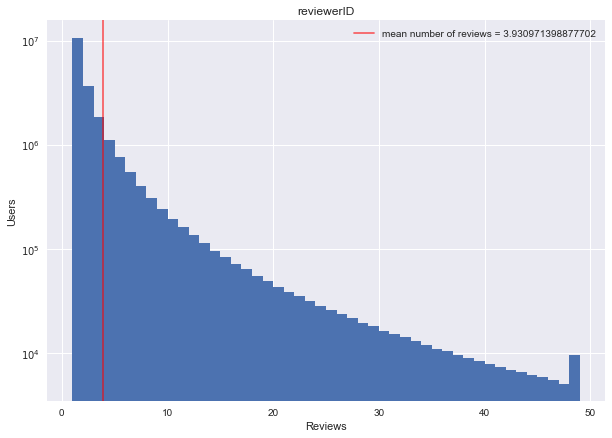

In [108]:
#Call the plotting function

plotting(df_grpRevUser, xmin=1, xmax=50, density=False, logscale=True, xlabel="Reviews", ylabel="Users")

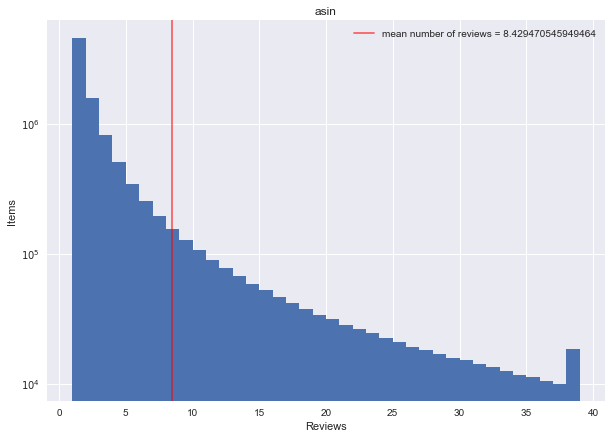

In [109]:
#Call the plotting function

plotting(df_grpRevItem, xmin=1, xmax=40, density=False, logscale=True, xlabel="Reviews", ylabel="Items")

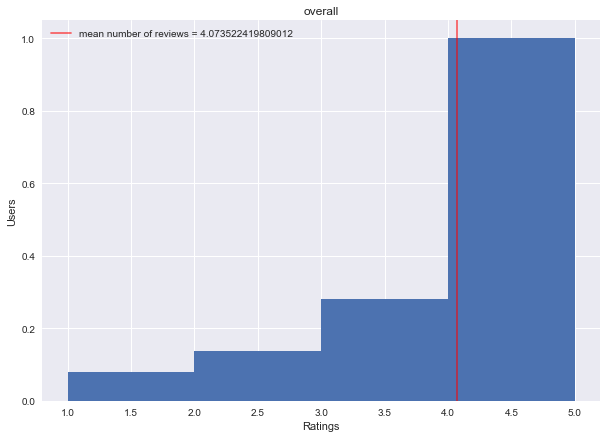

In [110]:
#Call the plotting function

plotting(df_grpRateUser, density=True, logscale=False, xlabel="Ratings", ylabel="Users")

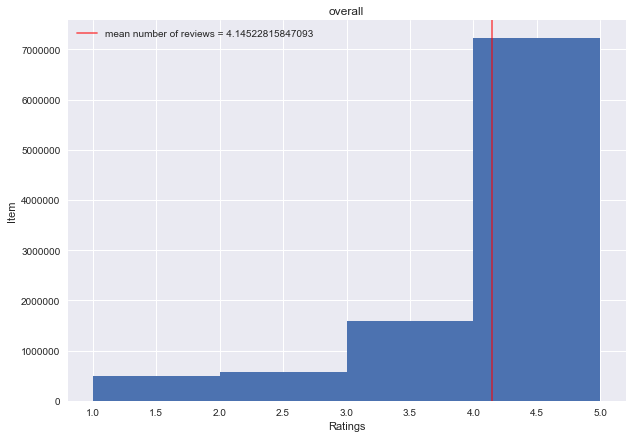

In [111]:
#Call the plotting function

plotting(df_grpRateItem, density=False, logscale=False, xlabel="Ratings", ylabel="Item")

In [ ]:
from scipy import stats, integrate
import seaborn as sns
sns.set(color_codes=True)
sns.distplot(df_grpRevUser, kde=False, rug=True);

# Data Operation

## Storing in nested dictionary

In [ ]:
users = pd.read_pickle("users.pkl")
items = pd.read_pickle("items.pkl")

In [ ]:
import collections
dataRatings = {}

for item in items['Items']:
    dataRatings[item] = {}
    """for user in users['Users']:
        if(len(dataset[dataset['asin'] == item][dataset['reviewerID'] ==user].overall) > 0):
            dataRatings[item][user]=dataset[dataset['asin'] == item][dataset['reviewerID'] ==user].overall"""


In [ ]:
#dataset
df2 = pd.DataFrame(dataset[['asin','reviewerID','overall']], index=dataset['asin'])

#dataset[dataset['asin'] == 'B003UYU16G'][dataset['reviewerID'] =='A00000262KYZUE4J55XGL'].overall

In [ ]:
for index, row in dataset.iterrows():
    dataRatings(row['asin']).append({row['reviewerID'],row['overall']})

In [ ]:
dataset.setindex('asin')

In [ ]:
dataRatings = {}
dataRatings = dataset[['asin','reviewerID','overall']].set_index('asin', drop=False,verify_integrity=False).T.to_dict(orient="index")

In [ ]:
dataRatings.get(0).get('reviewerID')

In [ ]:
dataRatings

In [ ]:
df_RU

In [ ]:
item_user={k: g["reviewerID"].tolist() for k,g in df.groupby("asin")}
item_user

In [ ]:
item_user

In [ ]:
def data_report(df=None):
    # print various information, num users, items, density, etc...
    
    df.groupby('reviewerID').agg(['mean', 'count']).hist()
    return